In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
import math

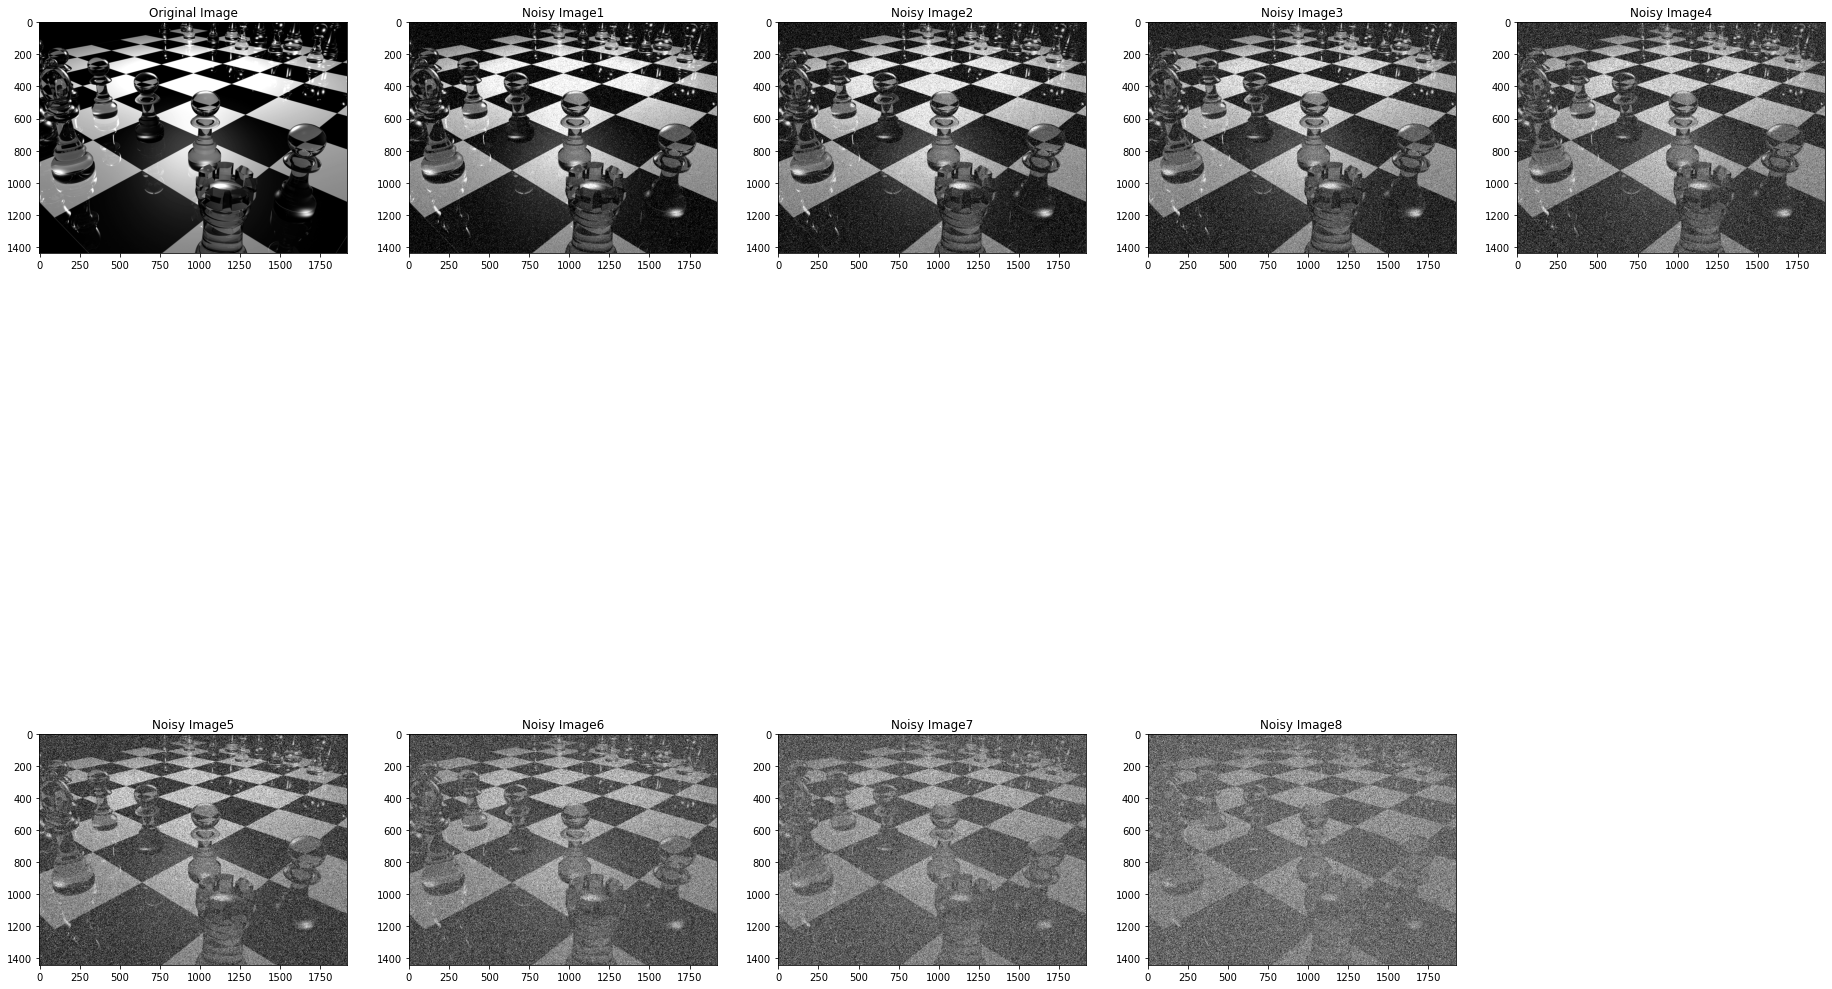

In [13]:
import random

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('100.jpg',0) # Only for grayscale image

for k in range(9):
  noise_img = sp_noise(image,0.05*(k+1))
  cv2.imwrite('sp_noise'+str(k+1)+'.jpg', noise_img)




plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(251), plt.imshow(image, "gray"), plt.title("Original Image")


for k in range(8):
  image = cv2.imread('sp_noise'+str(k+1)+'.jpg',0)
  plt.subplot(252+k), plt.imshow(image, "gray"), plt.title("Noisy Image"+str(k+1))



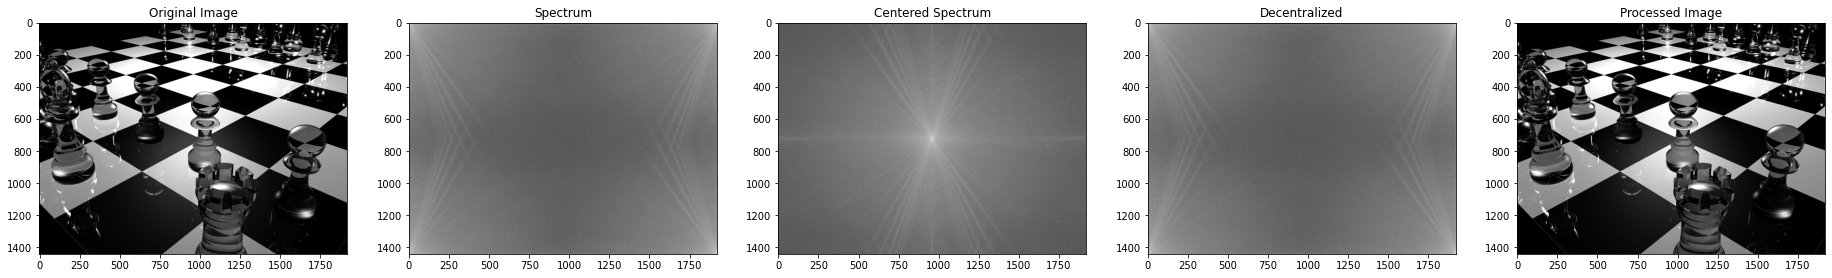

In [14]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("100.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

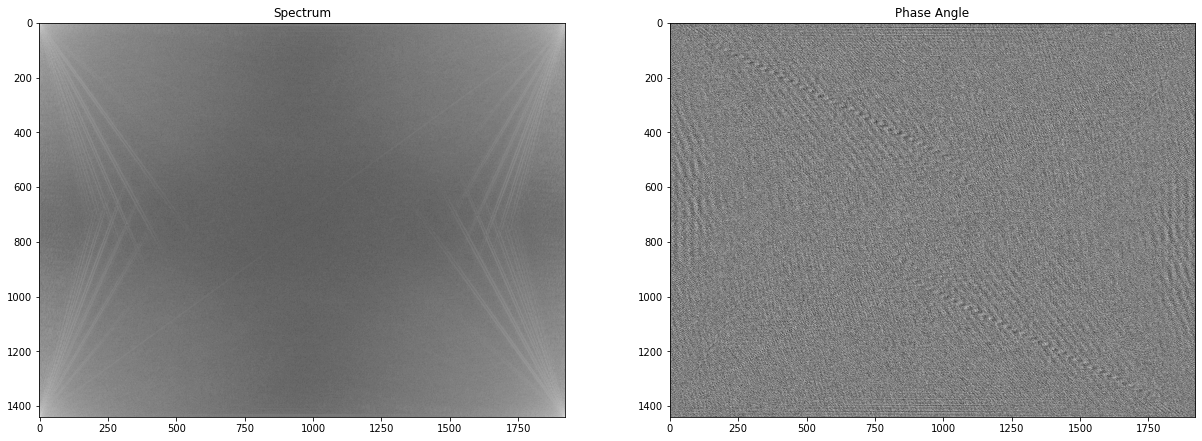

In [15]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("100.jpg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [16]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

***Low Pass and High Pass Ideal, Butterworth and Gaussian filters with 
threshold*** $\Delta$***frequency = 50***

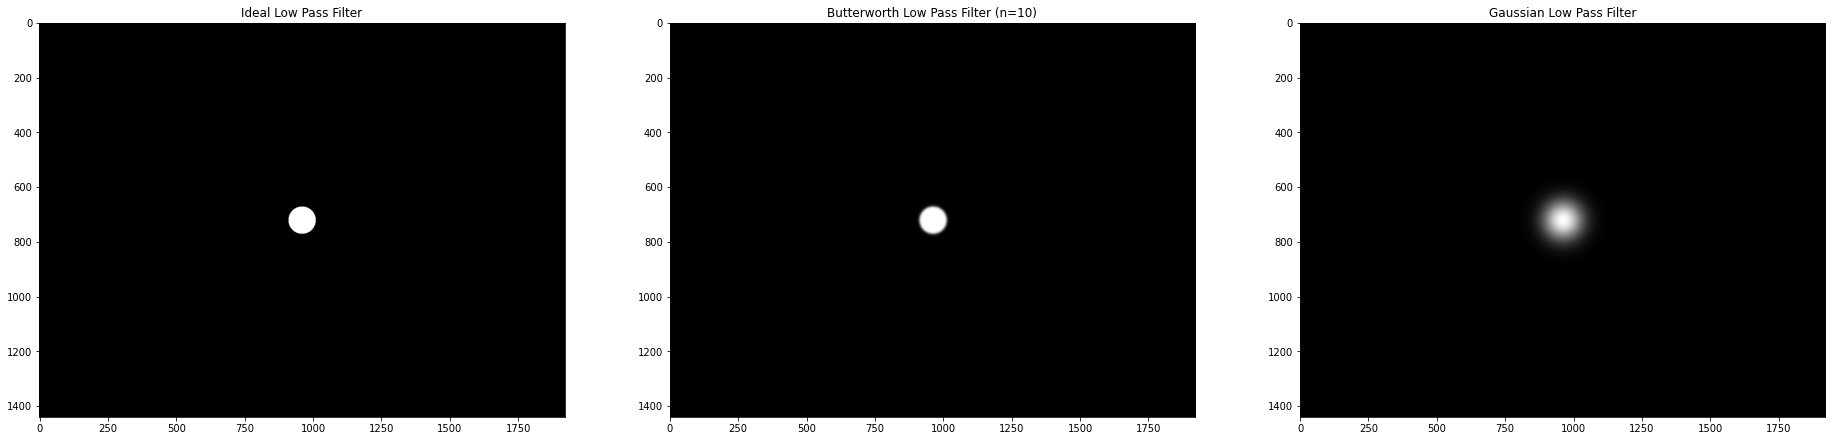

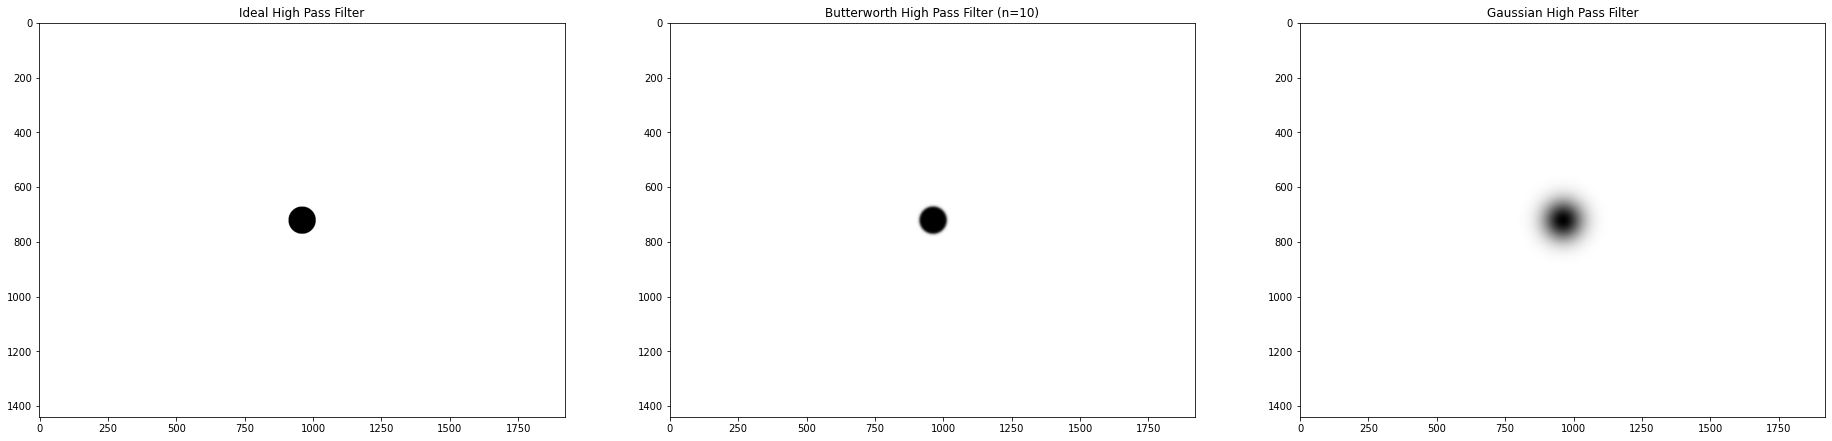

In [17]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

***Example of effective noise removal using the ideal low pass filter***

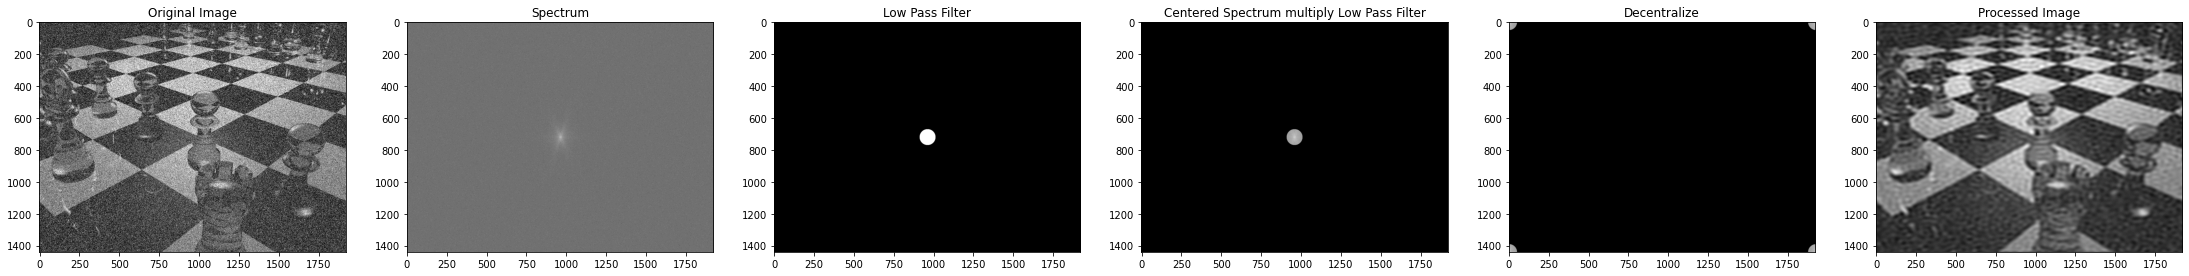

In [18]:
img = cv2.imread("sp_noise5.jpg", 0)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(163), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

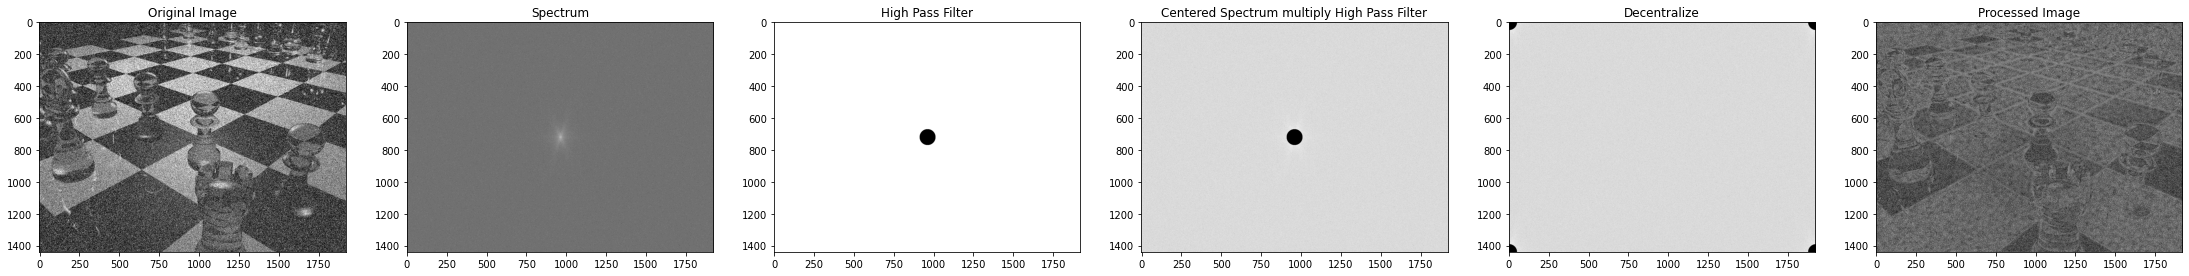

In [19]:
img = cv2.imread("sp_noise5.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(163), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

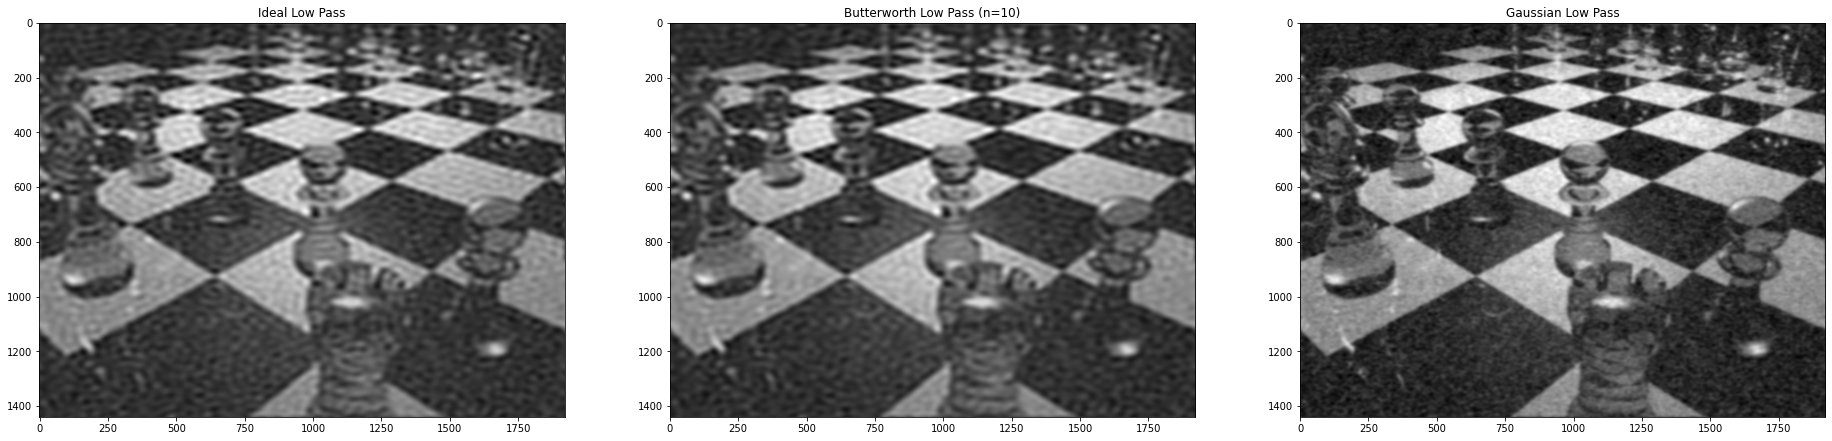

In [20]:
img = cv2.imread("sp_noise5.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

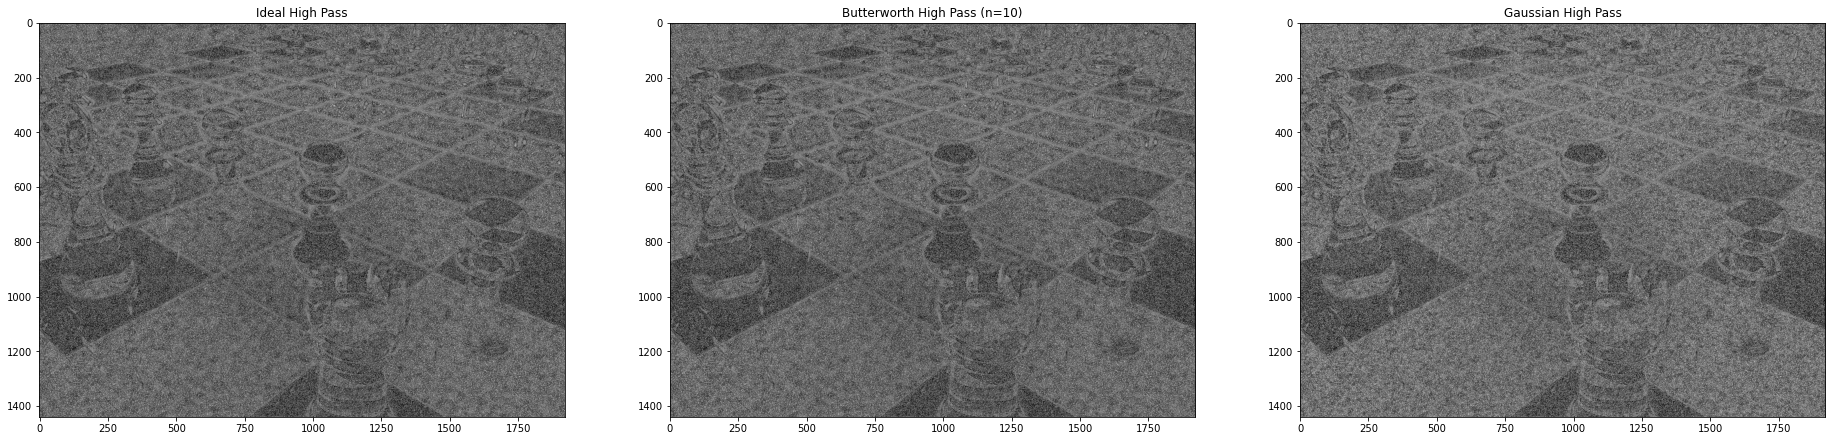

In [21]:
img = cv2.imread("sp_noise5.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,40)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

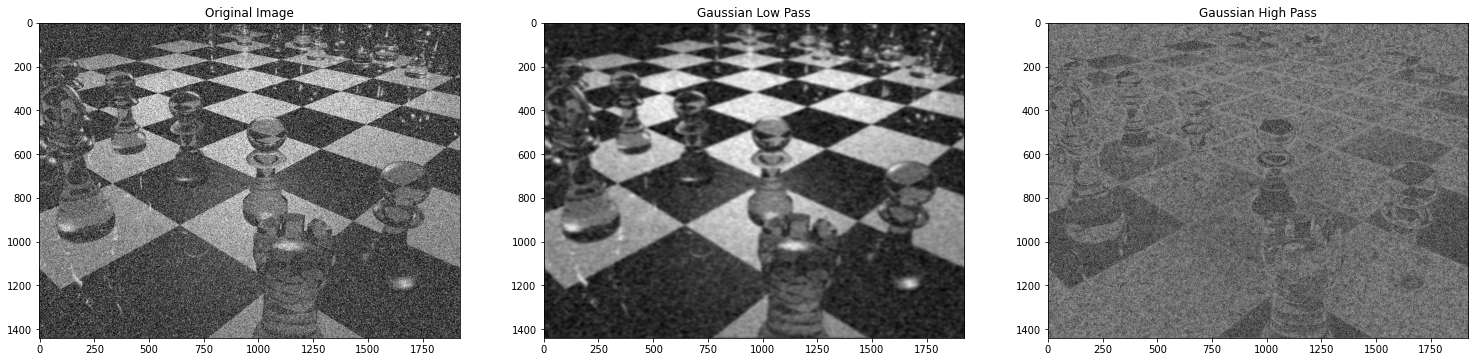

In [22]:
img = cv2.imread("sp_noise5.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")


plt.show()

In [23]:
from skimage import measure 

img_ = cv2.imread("100.jpg", 0)
img_ref = img_.astype(np.float64)

PSNR_l_g = []
PSNR_h_g = []
PSNR_l_b = [] 
PSNR_h_b = [] 
SSIM_h_g = [] 
SSIM_l_g = []
SSIM_h_b = []
SSIM_l_b = []


for i in range(9):
  img = cv2.imread("sp_noise"+str(i+1)+".jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  LowPassCenter_g = center * gaussianLP(50,img.shape)
  LowPass_g = np.fft.ifftshift(LowPassCenter_g)
  inverse_LowPass_g = np.fft.ifft2(LowPass_g)

  mse = np.mean(np.abs(img_ref - inverse_LowPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_l_g.append(psnr_g)

  SSIM_l_g.append((np.abs(measure.compare_ssim(img_ref, inverse_LowPass_g))))

  LowPassCenter_b = center * butterworthLP(50,img.shape,10)
  LowPass_b = np.fft.ifftshift(LowPassCenter_b)
  inverse_LowPass_b = np.fft.ifft2(LowPass_b)

  mse = np.mean(np.abs(img_ref - inverse_LowPass_b)**2)
  psnr_b = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_l_b.append(psnr_b)

  SSIM_l_b.append((np.abs(measure.compare_ssim(img_ref, inverse_LowPass_b))))

    

for i in range(9):
  img = cv2.imread("sp_noise"+str(i+1)+".jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  HighPassCenter_g = center * gaussianHP(50,img.shape)
  HighPass_g = np.fft.ifftshift(HighPassCenter_g)
  inverse_HighPass_g = np.fft.ifft2(HighPass_g)

  mse = np.mean(np.abs(img_ref - inverse_HighPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_h_g.append(psnr_g)

  SSIM_h_g.append((np.abs(measure.compare_ssim(img_ref, inverse_HighPass_g))))

  HighPassCenter_b = center * butterworthHP(50,img.shape,10)
  HighPass_b = np.fft.ifftshift(HighPassCenter_b)
  inverse_HighPass_b = np.fft.ifft2(HighPass_b)

  mse = np.mean(np.abs(img_ref - inverse_HighPass_b)**2)
  psnr_b = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_h_b.append(psnr_b)

  SSIM_h_b.append((np.abs(measure.compare_ssim(img_ref, inverse_HighPass_b))))

  
print(PSNR_l_g)
print(PSNR_h_g)
print(PSNR_l_b)
print(PSNR_h_b)
print(SSIM_l_g)
print(SSIM_h_g)
print(SSIM_l_b)
print(SSIM_h_g)
  








/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structura

[19.769676136617697, 17.99116036197236, 16.185344673238284, 14.545265924108664, 13.100534308949598, 11.825365947880584, 10.681882411363826, 9.67105550412517, 8.767311834746106]
[6.655744784512426, 5.974741303848258, 5.4294517280072245, 4.986612505514231, 4.6247566694448885, 4.324676218308813, 4.07378249167785, 3.8722394198750694, 3.7104289740007785]
[19.01534857305222, 17.635208584812673, 16.03578807893691, 14.49783969341742, 13.093808651598193, 11.836412644207218, 10.697683535375697, 9.683761516427218, 8.775624521362134]
[6.565366218592448, 5.906063772829012, 5.375813616184807, 4.944126296242672, 4.590600581172793, 4.29672476458397, 4.05090158241971, 3.8535058678063363, 3.6946577885340464]
[0.12513035047330312, 0.10151329535376338, 0.08413135361013416, 0.06950988144455984, 0.059090207556812005, 0.047435998771562786, 0.03422159909125296, 0.023173283645469354, 0.011085245141073589]
[0.009571700129683666, 0.003773170454957827, 0.002270412554872288, 0.001745223515792768, 0.001255977440352

In [24]:
from skimage import measure 

img_ = cv2.imread("100.jpg", 0)
img_ref = img_.astype(np.float64)

PSNR_l_g = []
PSNR_h_g = []
PSNR_l_b = [] 
PSNR_h_b = [] 
SSIM_h_g = [] 
SSIM_l_g = []
SSIM_h_b = []
SSIM_l_b = []


for i in range(9):
  img = cv2.imread("sp_noise"+str(i+1)+".jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  LowPassCenter_g = center * gaussianLP(50,img.shape)
  LowPass_g = np.fft.ifftshift(LowPassCenter_g)
  inverse_LowPass_g = np.fft.ifft2(LowPass_g)

  mse = np.mean(np.abs(img_ref - inverse_LowPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_l_g.append(psnr_g)

  SSIM_l_g.append(measure.compare_ssim(img_ref, inverse_LowPass_g))

  LowPassCenter_b = center * butterworthLP(50,img.shape,10)
  LowPass_b = np.fft.ifftshift(LowPassCenter_b)
  inverse_LowPass_b = np.fft.ifft2(LowPass_b)

  mse = np.mean(np.abs(img_ref - inverse_LowPass_b)**2)
  psnr_b = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_l_b.append(psnr_b)

  SSIM_l_b.append(measure.compare_ssim(img_ref, inverse_LowPass_b))

    

for i in range(9):
  img = cv2.imread("sp_noise"+str(i+1)+".jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  HighPassCenter_g = center * gaussianHP(50,img.shape)
  HighPass_g = np.fft.ifftshift(HighPassCenter_g)
  inverse_HighPass_g = np.fft.ifft2(HighPass_g)

  mse = np.mean(np.abs(img_ref - inverse_HighPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_h_g.append(psnr_g)

  SSIM_h_g.append(measure.compare_ssim(img_ref, inverse_HighPass_g))
  
  HighPassCenter_b = center * butterworthHP(50,img.shape,10)
  HighPass_b = np.fft.ifftshift(HighPassCenter_b)
  inverse_HighPass_b = np.fft.ifft2(HighPass_b)

  mse = np.mean(np.abs(img_ref - inverse_HighPass_b)**2)
  psnr_b = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_h_b.append(psnr_b)

  SSIM_h_b.append(measure.compare_ssim(img_ref, inverse_HighPass_b))

  
print(PSNR_l_g)
print(PSNR_h_g)
print(PSNR_l_b)
print(PSNR_h_b)
print(SSIM_l_g)
print(SSIM_h_g)
print(SSIM_l_b)
print(SSIM_h_g)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structura

[19.769676136617697, 17.99116036197236, 16.185344673238284, 14.545265924108664, 13.100534308949598, 11.825365947880584, 10.681882411363826, 9.67105550412517, 8.767311834746106]
[6.655744784512426, 5.974741303848258, 5.4294517280072245, 4.986612505514231, 4.6247566694448885, 4.324676218308813, 4.07378249167785, 3.8722394198750694, 3.7104289740007785]
[19.01534857305222, 17.635208584812673, 16.03578807893691, 14.49783969341742, 13.093808651598193, 11.836412644207218, 10.697683535375697, 9.683761516427218, 8.775624521362134]
[6.565366218592448, 5.906063772829012, 5.375813616184807, 4.944126296242672, 4.590600581172793, 4.29672476458397, 4.05090158241971, 3.8535058678063363, 3.6946577885340464]
[0.12513035047330312, 0.10151329535376338, 0.08413135361013416, 0.06950988144455984, 0.059090207556812005, 0.047435998771562786, 0.03422159909125296, 0.023173283645469354, 0.011085245141073589]
[-0.009571700129683666, -0.003773170454957827, -0.002270412554872288, -0.001745223515792768, -0.0012559774

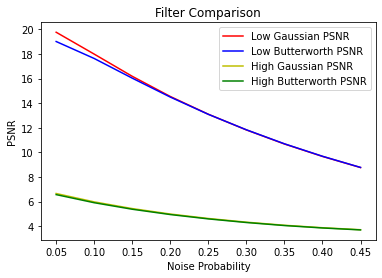

In [25]:
X = np.linspace(0.05, 0.45, 9)
plt.plot(X, PSNR_l_g, color = 'r', label = 'Low Gaussian PSNR')
plt.plot(X, PSNR_l_b, color = 'b', label = 'Low Butterworth PSNR')
plt.plot(X, PSNR_h_g, color = 'y', label = 'High Gaussian PSNR')
plt.plot(X, PSNR_h_b, color = 'g', label = 'High Butterworth PSNR')



plt.xlabel('Noise Probability')
plt.ylabel('PSNR')
plt.title('Filter Comparison')

plt.legend()

plt.show()

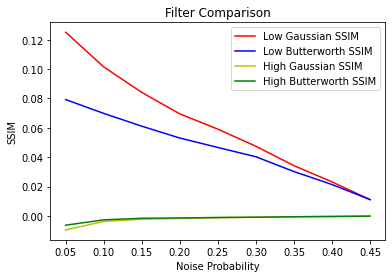

In [26]:
X = np.linspace(0.05, 0.45, 9)

plt.plot(X, SSIM_l_g, color = 'r', label = 'Low Gaussian SSIM')
plt.plot(X, SSIM_l_b, color = 'b', label = 'Low Butterworth SSIM')
plt.plot(X, SSIM_h_g, color = 'y', label = 'High Gaussian SSIM')
plt.plot(X, SSIM_h_b, color = 'g', label = 'High Butterworth SSIM')

plt.xlabel('Noise Probability')
plt.ylabel('SSIM')
plt.title('Filter Comparison')

plt.legend()

plt.show()

In [37]:
filter_PSNR_gl = []
filter_SSIM_gl = []
filter_PSNR_bl = []
filter_SSIM_bl = []

for i in range(9):
  img = cv2.imread("sp_noise5.jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  LowPassCenter_g = center * gaussianLP(25*(i+1),img.shape)
  LowPass_g = np.fft.ifftshift(LowPassCenter_g)
  inverse_LowPass_g = np.fft.ifft2(LowPass_g)

  mse = np.mean(np.abs(img_ref - inverse_LowPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  filter_PSNR_gl.append(psnr_g)

  filter_SSIM_gl.append(measure.compare_ssim(img_ref, inverse_LowPass_g))

  LowPassCenter_b = center * butterworthLP(25*(i+1),img.shape,10)
  LowPass_b = np.fft.ifftshift(LowPassCenter_b)
  inverse_LowPass_b = np.fft.ifft2(LowPass_b)

  mse = np.mean(np.abs(img_ref - inverse_LowPass_b)**2)
  psnr_b = 20 * math.log10(255.0 / math.sqrt(mse))
  filter_PSNR_bl.append(psnr_b)

  filter_SSIM_bl.append(measure.compare_ssim(img_ref, inverse_LowPass_b))

print(filter_PSNR_gl)
print(filter_SSIM_gl)
print(filter_PSNR_bl)
print(filter_SSIM_bl)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


[12.547985552658648, 13.100534308949598, 13.29909806098451, 13.36308814843096, 13.352833191567509, 13.293185938989465, 13.1970761922226, 13.072421034849233, 12.924726832539516]
[0.04789021684881342, 0.059090207556812005, 0.06928738179782415, 0.07624560915293843, 0.0803795005613787, 0.08212215943356513, 0.08221873826359864, 0.08123994962189052, 0.07956407047612628]
[12.516536956992098, 13.093808651598193, 13.308574168052381, 13.385220316805524, 13.387642172895939, 13.339481558700797, 13.255492257470564, 13.1448288412113, 13.010037813240663]
[0.028759392173399335, 0.04661280678253798, 0.06033465942420231, 0.07003509734327287, 0.07653086927035295, 0.0803318594750965, 0.0818195528743649, 0.08220074445249757, 0.08136821381113439]


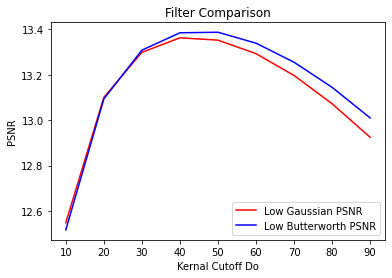

In [38]:
X = np.linspace(10, 90, 9)
plt.plot(X, filter_PSNR_gl,color = 'r', label = 'Low Gaussian PSNR')
plt.plot(X, filter_PSNR_bl, color = 'b', label = 'Low Butterworth PSNR')


plt.xlabel('Kernal Cutoff Do')
plt.ylabel('PSNR')
plt.title('Filter Comparison')

plt.legend()

plt.show()

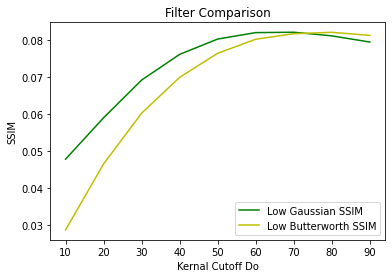

In [39]:
X = np.linspace(10, 90, 9)
plt.plot(X, filter_SSIM_gl,color = 'g', label = 'Low Gaussian SSIM')
plt.plot(X, filter_SSIM_bl, color = 'y', label = 'Low Butterworth SSIM')


plt.xlabel('Kernal Cutoff Do')
plt.ylabel('SSIM')
plt.title('Filter Comparison')

plt.legend()

plt.show()

In [34]:
filter_PSNR_gh = []
filter_SSIM_gh = []
filter_PSNR_bh = []
filter_SSIM_bh = []

for i in range(9):
  img = cv2.imread("sp_noise5.jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  HighPassCenter_g = center * gaussianHP(25*(i+1),img.shape)
  HighPass_g = np.fft.ifftshift(HighPassCenter_g)
  inverse_HighPass_g = np.fft.ifft2(HighPass_g)

  mse = np.mean(np.abs(img_ref - inverse_HighPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  filter_PSNR_gh.append(psnr_g)

  filter_SSIM_gh.append(measure.compare_ssim(img_ref, inverse_HighPass_g))

  HighPassCenter_b = center * butterworthHP(25*(i+1),img.shape,10)
  HighPass_b = np.fft.ifftshift(HighPassCenter_b)
  inverse_HighPass_b = np.fft.ifft2(HighPass_b)

  mse = np.mean(np.abs(img_ref - inverse_HighPass_b)**2)
  psnr_b = 20 * math.log10(255.0 / math.sqrt(mse))
  filter_PSNR_bh.append(psnr_b)

  filter_SSIM_bh.append(measure.compare_ssim(img_ref, inverse_HighPass_b))


print(filter_PSNR_gh)
print(filter_SSIM_gh)
print(filter_PSNR_bh)
print(filter_SSIM_bh)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.7/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


[4.715591157775681, 4.6247566694448885, 4.604871391016035, 4.612441880696113, 4.637222619675914, 4.67559671081608, 4.726085006626354, 4.788031004354124, 4.860977671213702]
[-0.0010892980008986232, -0.0012559774403528578, -0.001081775062663617, -0.0008187704799197201, -0.0005901820748271008, -0.00042110578758834953, -0.0003014917957526109, -0.0002168778781231536, -0.00015622055160590607]
[4.680142371001448, 4.590600581172793, 4.561645645538622, 4.5529997839368415, 4.554970829250359, 4.564203468712274, 4.579007351197097, 4.5985693696578265, 4.622812591666859]
[-0.0007155971927000073, -0.0010991763532214821, -0.0011161335709319955, -0.0008966564736877104, -0.0006517164499982007, -0.0004040822350361972, -0.00019283648205483002, -6.0672497948469355e-05, 7.234069016471625e-06]


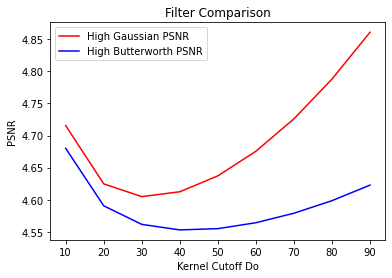

In [35]:
X = np.linspace(10, 90, 9)
plt.plot(X, filter_PSNR_gh,color = 'r', label = 'High Gaussian PSNR')
plt.plot(X, filter_PSNR_bh, color = 'b', label = 'High Butterworth PSNR')


plt.xlabel('Kernel Cutoff Do')
plt.ylabel('PSNR')
plt.title('Filter Comparison')

plt.legend()

plt.show()

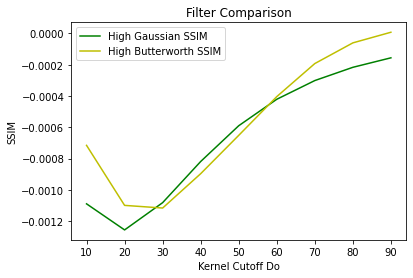

In [36]:
X = np.linspace(10, 90, 9)
plt.plot(X, filter_SSIM_gh,color = 'g', label = 'High Gaussian SSIM')
plt.plot(X, filter_SSIM_bh, color = 'y', label = 'High Butterworth SSIM')


plt.xlabel('Kernel Cutoff Do')
plt.ylabel('SSIM')
plt.title('Filter Comparison')

plt.legend()

plt.show()